# Libraries import

In [1]:
# for data load, clean, and EDA analysis....
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for model training & testing.... 
from sklearn.model_selection import train_test_split

# for applying ml methods....
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# for perform mathematical score......
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# for load & save model.......
from sklearn.pipeline import Pipeline



# data load and clean

In [2]:
#  Load data from dataset.....
df = pd.read_csv("mental_health_dataset.csv")
df.head(10)

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High
5,38,Female,Unemployed,On-site,Yes,Yes,3,9.9,3,17,9,63,69.3,Medium
6,56,Non-binary,Employed,Remote,No,Yes,2,5.5,1,25,3,87,63.1,Medium
7,36,Male,Student,Remote,No,No,8,7.1,5,25,8,72,58.4,Medium
8,40,Male,Employed,Hybrid,No,No,7,6.5,6,28,6,46,60.4,Medium
9,28,Female,Employed,Remote,No,No,8,3.1,0,7,18,88,93.2,Medium


In [3]:
# check null values in dataset........
df.isnull().sum()

age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64

In [4]:
# Remove duplicate values, if any......
df.drop_duplicates()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,Female,Employed,On-site,Yes,Yes,5,6.1,3,9,21,8,90.0,Medium
9996,47,Male,Employed,On-site,Yes,No,1,5.7,3,5,12,45,90.8,Medium
9997,56,Female,Employed,On-site,Yes,No,1,8.3,0,1,18,7,99.2,Medium
9998,24,Male,Employed,On-site,Yes,Yes,9,6.1,0,28,21,32,56.7,High


In [5]:
# check shape of data........
df.shape

(10000, 14)

In [6]:
# check mathematical relations.........
df.describe()

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.557600,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,13.749581,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,18.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,30.000000,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,41.500000,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,53.000000,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,65.000000,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


In [7]:
# check data types of all columns.....
df.dtypes

age                         int64
gender                     object
employment_status          object
work_environment           object
mental_health_history      object
seeks_treatment            object
stress_level                int64
sleep_hours               float64
physical_activity_days      int64
depression_score            int64
anxiety_score               int64
social_support_score        int64
productivity_score        float64
mental_health_risk         object
dtype: object

In [8]:
# transform sleep_hours and productivity_score in complete numerical values.....
df['sleep_hours'] = pd.to_numeric(df['sleep_hours'])
df['productivity_score'] = pd.to_numeric(df['productivity_score'])

In [9]:
# extracting information from a column......
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

In [10]:
# creating a clean dataframe by removing old index.....
df.reset_index(drop=True, inplace=True)

In [11]:
df.head(5)

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


# Seprate numerical and cateogical values for EDA perform

In [12]:
# extracting numerical columns from a dataframe.....
numeric_df = df.select_dtypes(include=['number'])

In [13]:
numeric_df.head(5)

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
0,56,6,6.2,3,28,17,54,59.7
1,46,10,9.0,4,30,11,85,54.9
2,32,7,7.7,2,24,7,62,61.3
3,60,4,4.5,4,6,0,95,97.0
4,25,3,5.4,0,24,12,70,69.0


In [14]:
# extracting categorical columns from a dataframe.....
object_df = df.select_dtypes(include=['object'])
object_df.head(5)

,gender,employment_status,work_environment,mental_health_history,seeks_treatment,mental_health_risk
0,Male,Employed,On-site,Yes,Yes,High
1,Female,Student,On-site,No,Yes,High
2,Female,Employed,On-site,Yes,No,Medium
3,Non-binary,Self-employed,On-site,No,No,Low
4,Female,Self-employed,On-site,Yes,Yes,High


# Exploratory Data Analysis (EDA) Perform

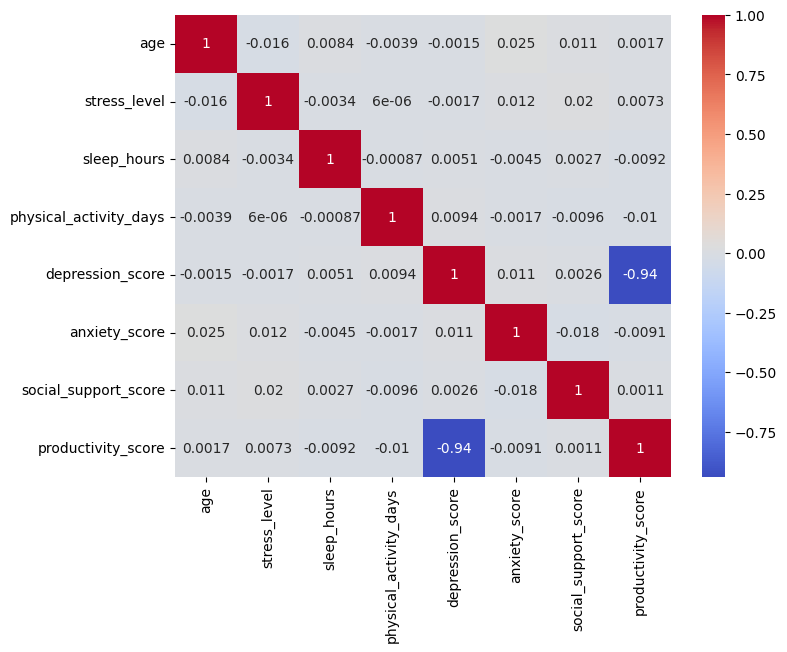

In [15]:
# finding correlation via heatmap.....
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

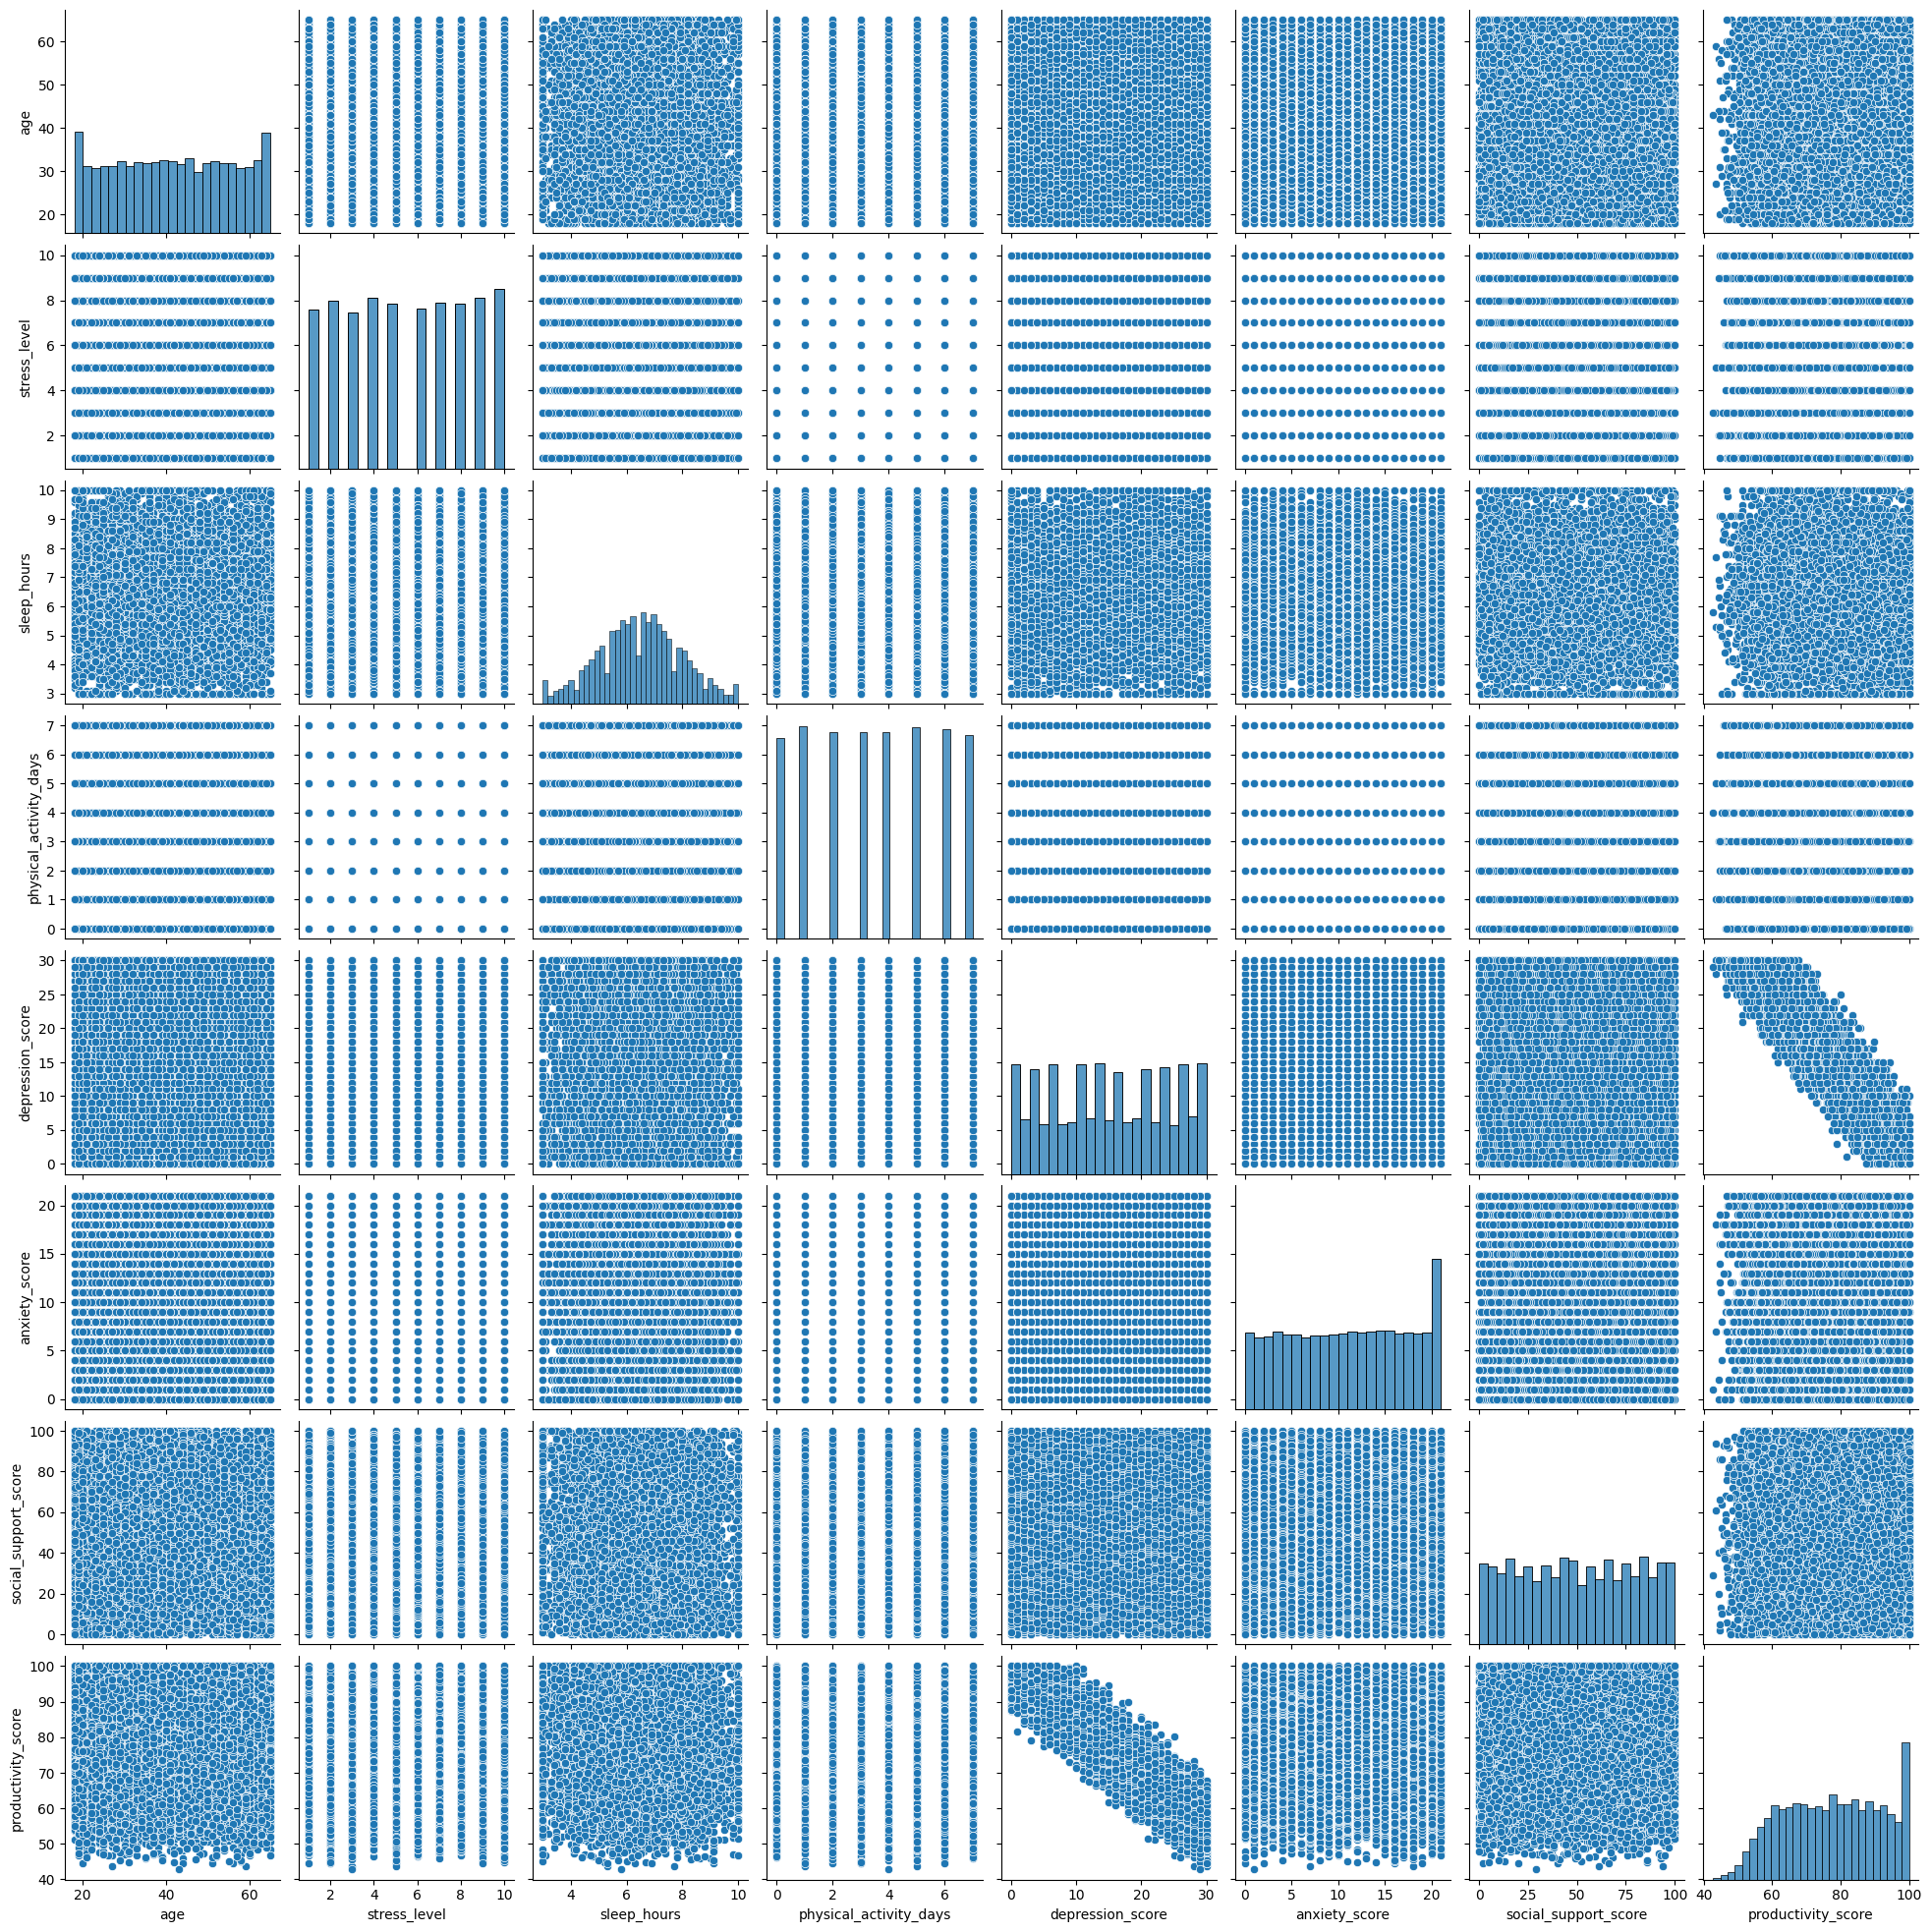

In [16]:
# plot a pairplot......
sns.pairplot(numeric_df)
plt.show()

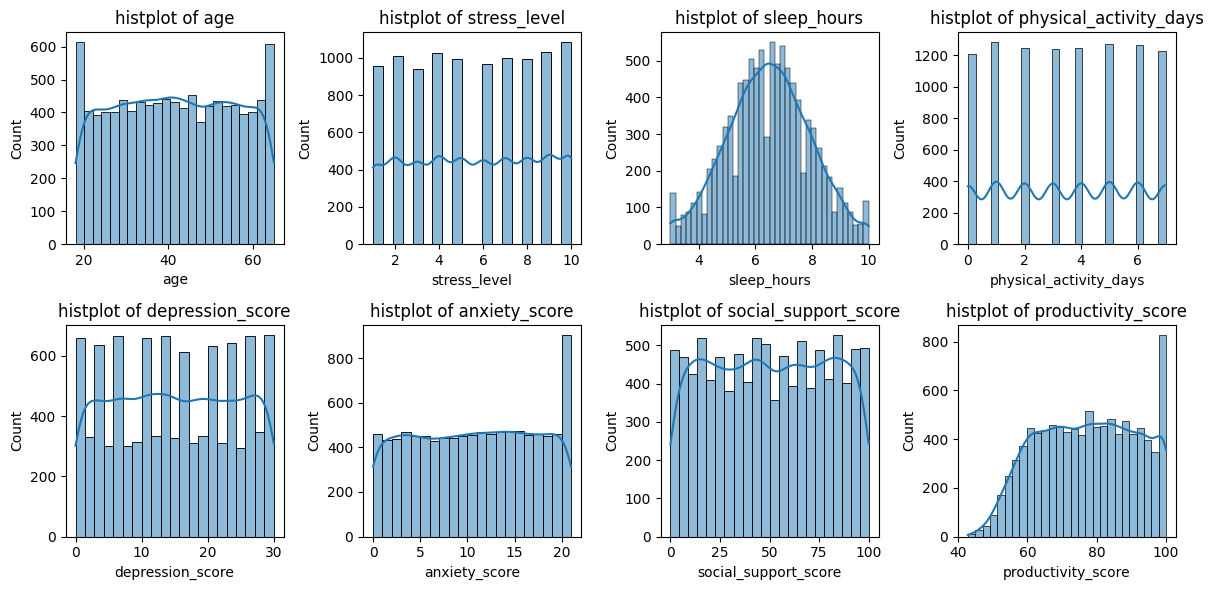

In [17]:
# plot a histplot on numerical data......
fig, axes = plt.subplots(2,4 , figsize=(12,6))
axes = axes.flatten()
for i, col in enumerate(numeric_df):
    sns.histplot(df[col], kde=True, ax=axes[i], legend=False)
    axes[i].set_title(f"histplot of {col}")

plt.tight_layout()
plt.show()


In [18]:
#  for object 

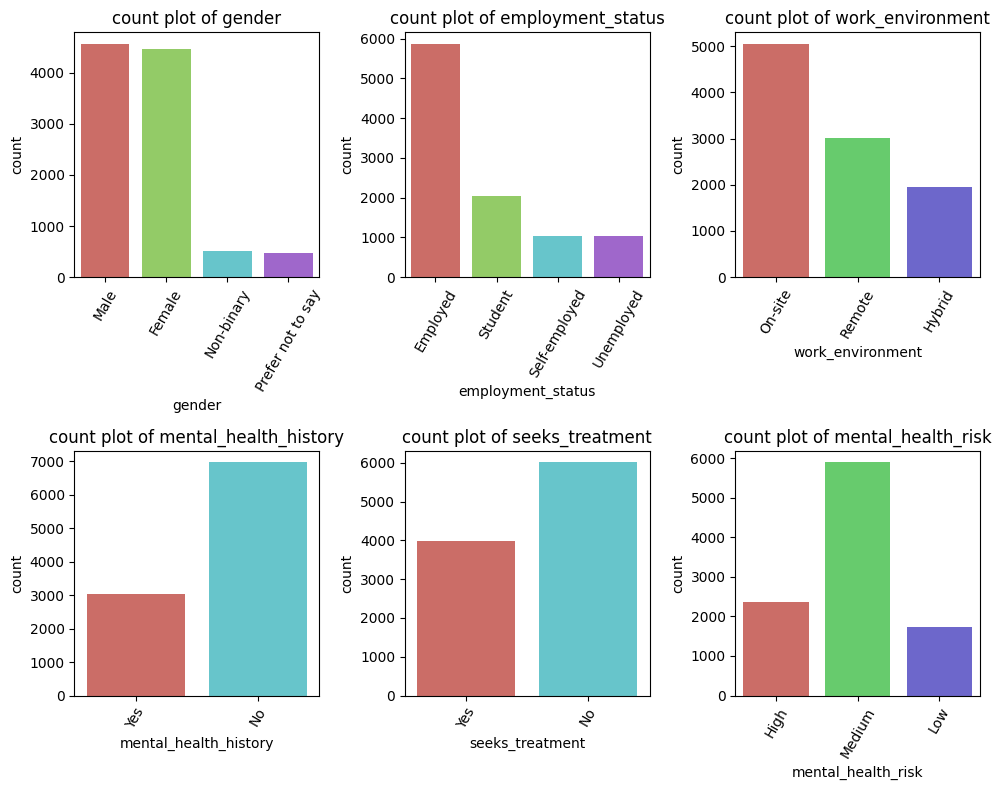

In [19]:
# plot a countplot on a categorical column......
fig, axes = plt.subplots(2,3, figsize=(10,8))
axes = axes.flatten()
for i, cls in enumerate(object_df):
    sns.countplot(data=df, x=cls, palette='hls', ax=axes[i], hue=cls, legend=False)
    axes[i].set_title(f"count plot of {cls}")
    axes[i].tick_params(axis='x', rotation=60)

for j in range(len(object_df), len(axes)):
    fig.delaxes(j)
    
plt.tight_layout()
plt.show()

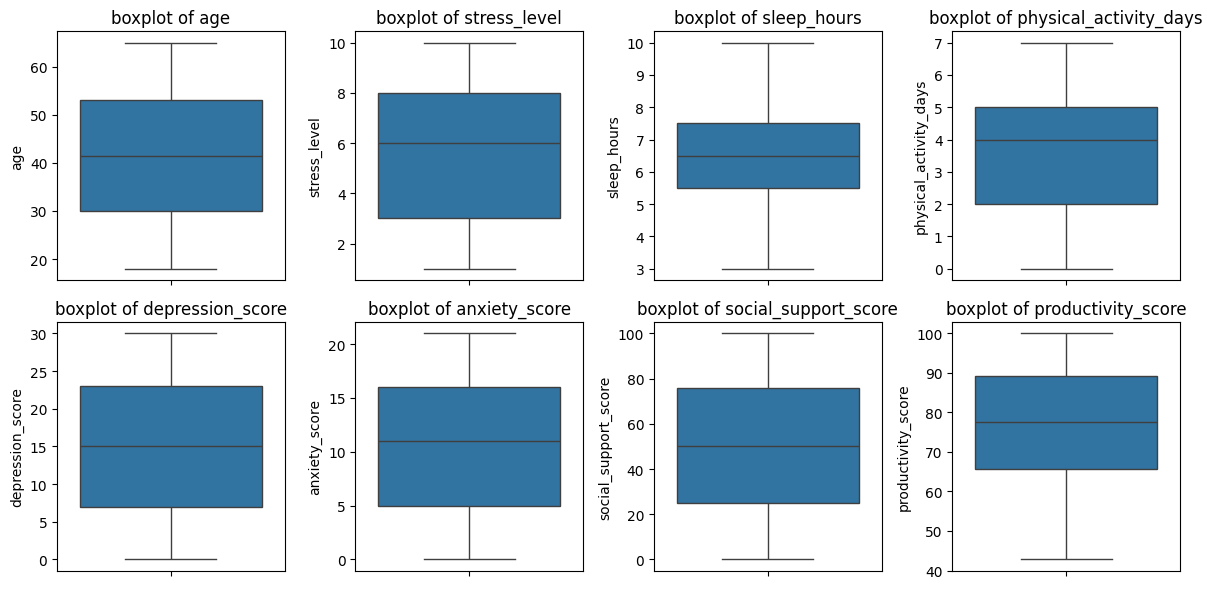

In [20]:
# find outliers through boxplot.....
fig, axes = plt.subplots(2,4 , figsize=(12,6))
axes = axes.flatten()
for i, col in enumerate(numeric_df):
    sns.boxplot(df[col], ax=axes[i], legend=False)
    axes[i].set_title(f"boxplot of {col}")

plt.tight_layout()
plt.show()

# Train, Test model and Apply Algorithm

In [21]:
# split dataset in train and test columns.....
x = df.drop(columns=['mental_health_risk'])
y = df['mental_health_risk']

In [22]:
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.2)

In [23]:
categorical_col = ['gender', 'employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment']	

In [24]:
numerical_col = ['age',	'stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']

In [25]:
# make a column transformer for encoding.....
preprocessor = ColumnTransformer(transformers =
    [
        ('cat' , OneHotEncoder(handle_unknown='ignore'), categorical_col)
    ], remainder='passthrough'
)
                                 

In [26]:
# make pipeline for apply methods......
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier())
]
                   )

In [27]:
# fit dataset in training datset.....
pipeline.fit(x_train, y_train)

C:\Users\Administration\PycharmProjects\pythonProject2\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'employment_status',
                                                   'work_environment',
                                                   'mental_health_history',
                                                   'seeks_treatment'])])),
                ('classifier', RandomForestClassifier())])

# Check Accuracy and Score (perform mathematical operations)

In [28]:
# predict testing datset......
y_pred = pipeline.predict(x_test)

In [29]:
# check cross validation score......
print("Corss validation Score: ", cross_val_score(pipeline, x_train, y_train, cv=5, scoring='accuracy').mean()*100)  

Corss validation Score:  95.81249999999999


In [30]:
# check accuracy score.....
print("Accuracy Score : ", accuracy_score(y_test, y_pred)*100)

Accuracy Score :  96.35000000000001


In [31]:
# check confusion matrix...
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

Confusion Matrix : 
 [[ 426    0   39]
 [   0  324   20]
 [  10    4 1177]]


In [32]:
# check classificarion report.....
print("Classification Report : \n", classification_report(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

        High       0.98      0.92      0.95       465
         Low       0.99      0.94      0.96       344
      Medium       0.95      0.99      0.97      1191

    accuracy                           0.96      2000
   macro avg       0.97      0.95      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [33]:
print(x_train.columns.tolist())

['age', 'gender', 'employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment', 'stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']


In [34]:
input_df = pd.DataFrame([[60, 'Non-Binary', 'Self-employed', 'On-site', 'no', 'No', 4, 4.5, 4, 6, 0, 95, 97.0]],
    columns=[
        'age', 'gender', 'employment_status', 'work_environment',
        'mental_health_history', 'seeks_treatment', 'stress_level',
        'sleep_hours', 'physical_activity_days', 'depression_score',
        'anxiety_score', 'social_support_score', 'productivity_score'
    ])
prediction = pipeline.predict(input_df)
print("prediction: ", prediction)

prediction:  ['Low']


# save the model using joblib.......

In [35]:
import joblib

In [36]:
joblib.dump(pipeline, 'model.pkl')